## NYC complaints 311 Calls

In this notebook we will exploit Pandas to perform data analysis on a dataset of calls to 311 (municipal calls, not emergency) in the New York City area.

Download the data from [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (Go to Export -> CSV).

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)


First, let's load the data. It will take some time...

In [2]:
complaints = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8,17,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
complaints.head()

# Same would have been with
# complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,30799952,06/08/2015 03:44:36 PM,06/09/2015 09:38:39 AM,DOT,Department of Transportation,Street Condition,Cave-in,Street,10309,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.518768,-74.210625,"(40.51876750770238, -74.21062507288462)"
1,30799953,06/08/2015 10:43:29 AM,06/09/2015 04:09:12 PM,DOT,Department of Transportation,Street Condition,Cave-in,Street,10456,TELLER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827049,-73.915040,"(40.82704935343712, -73.91503956914566)"
2,30799954,06/08/2015 02:26:39 PM,06/16/2015 05:42:07 PM,DOT,Department of Transportation,Street Condition,Cave-in,Street,11357,169-32 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.776298,-73.794467,"(40.77629832421394, -73.7944673063674)"
3,30799956,06/08/2015 08:21:03 PM,06/09/2015 04:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11385,60-20 68 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704292,-73.899305,"(40.7042917941881, -73.89930496178219)"
4,30799957,06/08/2015 01:35:47 PM,06/16/2015 05:45:21 PM,DOT,Department of Transportation,Street Condition,Cave-in,Street,11377,43-21 53 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743912,-73.911613,"(40.74391151928502, -73.91161254468453)"


In [4]:
complaints['Complaint Type'].unique()

array(['Street Condition', 'Noise - Commercial',
       'DOF Property - Owner Issue', 'Highway Condition',
       'Benefit Card Replacement', 'DOF Parking - Payment Issue',
       'Air Quality', 'Blocked Driveway', 'Indoor Air Quality',
       'Sidewalk Condition', 'Asbestos',
       'Missed Collection (All Materials)',
       'Root/Sewer/Sidewalk Condition', 'Building/Use', 'DOOR/WINDOW',
       'Broken Muni Meter', 'ELECTRIC', 'Curb Condition',
       'Sanitation Condition', 'Noise', 'Consumer Complaint',
       'New Tree Request', 'Housing - Low Income Senior',
       'Maintenance or Facility', 'Construction', 'Noise - Helicopter',
       'DOF Parking - DMV Clearance', 'Elevator', 'Damaged Tree',
       'PAINT/PLASTER', 'Street Light Condition', 'Noise - Vehicle',
       'Overgrown Tree/Branches', 'Water System', 'Noise - Residential',
       'SCRIE', 'Hazardous Materials', 'HEAT/HOT WATER',
       'Derelict Vehicles', 'DOF Property - Property Value',
       'Food Establishment', 'D

In [5]:
complaints[['Complaint Type', 'Borough']][:10]
# complaints[:10][['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Street Condition,STATEN ISLAND
1,Street Condition,BRONX
2,Street Condition,QUEENS
3,Noise - Commercial,QUEENS
4,Street Condition,QUEENS
5,Street Condition,QUEENS
6,DOF Property - Owner Issue,MANHATTAN
7,Highway Condition,MANHATTAN
8,Benefit Card Replacement,Unspecified
9,DOF Parking - Payment Issue,Unspecified


In [6]:
complaints['Complaint Type'].value_counts()

Noise - Residential                    1748673
HEAT/HOT WATER                         1152592
Street Condition                        947647
Street Light Condition                  898738
HEATING                                 887869
Blocked Driveway                        882649
Illegal Parking                         864236
PLUMBING                                703637
Water System                            635424
GENERAL CONSTRUCTION                    500863
General Construction/Plumbing           487762
Noise                                   467069
Noise - Street/Sidewalk                 456160
UNSANITARY CONDITION                    438981
Traffic Signal Condition                424454
PAINT - PLASTER                         361258
Sewer                                   354588
PAINT/PLASTER                           341793
Dirty Conditions                        340985
Noise - Commercial                      339165
Request Large Bulky Item Collection     326335
ELECTRIC     

In [7]:
# Let's clean the data a bit
# WARNING: HUGE MEMORY required
complaints = complaints[~complaints['Complaint Type'].str.contains("Misc.")]

How many different distinct complaints have been issued?

In [8]:
complaint_count = complaints['Complaint Type'].value_counts()
complaint_count[:10]

Noise - Residential       1748673
HEAT/HOT WATER            1152592
Street Condition           947647
Street Light Condition     898738
HEATING                    887869
Blocked Driveway           882649
Illegal Parking            864236
PLUMBING                   703637
Water System               635424
GENERAL CONSTRUCTION       500863
Name: Complaint Type, dtype: int64

In [9]:
type(complaint_count)

pandas.core.series.Series

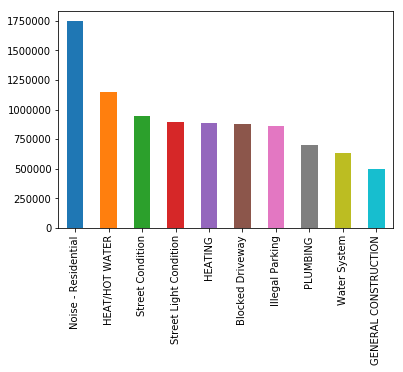

In [10]:
complaint_count[:10].plot(kind='bar')

What about the `noise` complaint?

In [11]:
noise_complaints = complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
248,30800567,06/08/2015 02:30:38 PM,06/09/2015 12:22:56 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10451,EAST 149 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.818934,-73.928750,"(40.81893427534037, -73.92875004205308)"
249,30800568,06/08/2015 08:35:17 PM,06/08/2015 11:20:56 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10459,1159 FOX STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.828731,-73.893852,"(40.82873077667152, -73.89385187319155)"
254,30800576,06/08/2015 09:51:48 PM,06/09/2015 12:20:44 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10456,1225 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.834288,-73.915609,"(40.834287583257066, -73.91560852329935)"


In [12]:
# Boolean indexing of dataframe
complaints['Complaint Type'] == 'Noise - Street/Sidewalk'

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
21580142    False
21580143    False
21580144    False
21580145    False
21580146     True
21580147    False
21580148    False
21580149    False
21580150    False
21580151    False
21580152    False
21580153    False
21580154    False
21580155    False
21580156    False
21580157    False
21580158    False
21580159    False
21580160    False
21580161    False
21580162    False
21580163    False
21580164    False
21580165    False
21580166  

In [13]:
is_noise = complaints['Complaint Type'] == 'Noise - Street/Sidewalk'
in_brooklyn = complaints['Borough'] == 'BROOKLYN'
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
255,30800577,06/08/2015 07:23:02 PM,06/08/2015 07:38:05 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,318 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662349,-73.950706,"(40.66234947850847, -73.95070599835685)"
263,30800585,06/08/2015 03:36:00 AM,06/08/2015 04:00:29 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11215,352 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.659080,-73.989677,"(40.65907956566361, -73.98967745734318)"
297,30800627,06/08/2015 11:12:35 PM,06/09/2015 12:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11208,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681675,-73.879127,"(40.681674670771734, -73.8791268829798)"
324,30800690,06/08/2015 03:39:39 AM,06/08/2015 03:59:27 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11215,351 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.659088,-73.989656,"(40.65908779806095, -73.989655830628)"
390,30800805,06/09/2015 01:03:42 AM,06/09/2015 02:16:18 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11205,692 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694605,-73.955832,"(40.694605400407276, -73.95583174788501)"


In [14]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date']][:10]

,Complaint Type,Borough,Created Date
255,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 07:23:02 PM
263,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 03:36:00 AM
297,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 11:12:35 PM
324,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 03:39:39 AM
390,Noise - Street/Sidewalk,BROOKLYN,06/09/2015 01:03:42 AM
570,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 10:21:21 PM
859,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 06:39:39 PM
870,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 09:24:08 PM
1302,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 02:20:05 PM
1307,Noise - Street/Sidewalk,BROOKLYN,06/08/2015 10:59:44 PM


In [15]:
type(complaints['Created Date'])

pandas.core.series.Series

In [16]:
is_noise[:3]

0    False
1    False
2    False
Name: Complaint Type, dtype: bool

In [17]:
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        184155
BROOKLYN         125147
BRONX             92142
QUEENS            45938
STATEN ISLAND      6509
Unspecified        2269
Name: Borough, dtype: int64

In [18]:
noise_complaints_counts = noise_complaints['Borough'].value_counts()
complaints_counts = complaints['Borough'].value_counts()

In [19]:
noise_complaints_counts / complaints_counts

BRONX            0.024551
BROOKLYN         0.019519
MANHATTAN        0.044081
QUEENS           0.009339
STATEN ISLAND    0.006015
Unspecified      0.001858
Name: Borough, dtype: float64

In [20]:
complaints_counts[:3]

BROOKLYN     6411662
QUEENS       4918743
MANHATTAN    4177659
Name: Borough, dtype: int64

In [21]:
noise_complaints_counts / complaints_counts.astype(float)

BRONX            0.024551
BROOKLYN         0.019519
MANHATTAN        0.044081
QUEENS           0.009339
STATEN ISLAND    0.006015
Unspecified      0.001858
Name: Borough, dtype: float64

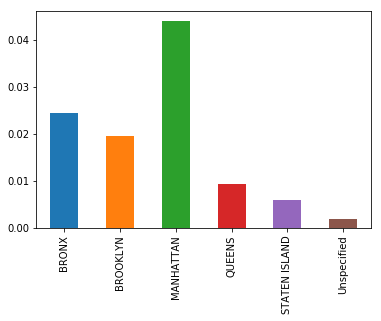

In [22]:
(noise_complaints_counts / complaints_counts.astype(float)).plot(kind='bar')